In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']
most_improved_list=['78','108','42','146','90']
least_improved_list=['36','107','106','35','105']
hardest_hit_list=['163','128','129','149','30']

In [3]:
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}
paramspenincomestatement = {
    "q": "QDataset",
    "dataset": "pensionincomestatement",
     "format": "json",
    #"variables": 
     #"v": ,
}

In [4]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)
penincomestatementresponse = requests.get(url,params=paramspenincomestatement)

In [5]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()
penincomestatement = penincomestatementresponse.json()

In [6]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])
penincomestatement_data_full = pd.DataFrame(penincomestatement[1:])

In [7]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]
penincomestatement_data_full.columns

Index(['adjustment_MktAssets', 'BegMktAssets_net', 'contrib_EE_other',
       'contrib_EE_PurchaseService', 'contrib_EE_regular', 'contrib_ER_other',
       'contrib_ER_regular', 'contrib_ER_state', 'contrib_ER_tot',
       'contrib_other', 'contrib_other_tot', 'contrib_tot', 'EEGroupID',
       'expense_AdminExpenses', 'expense_alternatives', 'expense_COLABenefits',
       'expense_DeathBenefits', 'expense_Depreciation',
       'expense_DisabilityBenefits', 'expense_DROPBenefits',
       'expense_investments', 'expense_investments_tot',
       'expense_LumpSumBenefits', 'expense_net', 'expense_OtherBenefits',
       'expense_OtherDeductions', 'expense_OtherInvestments',
       'expense_other_tot', 'expense_PrivateEquity', 'expense_RealEstate',
       'expense_refunds', 'expense_RetBenefits', 'expense_SecLendMgmtFees',
       'expense_SecuritiesLending', 'expense_SurvivorBenefits',
       'expense_TotBenefits', 'FairValueChange_investments',
       'FairValueChange_RealEstate', 'FairVa

In [8]:
#Create DF and drop any rows with empty data
penincomestatement_data_df=penincomestatement_data_full[['ppd_id','fy','expense_AdminExpenses','expense_investments_tot']].dropna()
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [9]:
penincomestatement_data_df.shape

(3576, 4)

In [10]:
plan_income_data_df=pd.merge(penincomestatement_data_df,plan_data_df,how="inner",on="ppd_id")
plan_income_data_df['expense_AdminExpenses'] = plan_income_data_df['expense_AdminExpenses'].astype(float)
plan_income_data_df['expense_investments_tot'] = plan_income_data_df['expense_investments_tot'].astype(float)

In [11]:
plan_income_data_df.shape

(3576, 8)

In [12]:
focus_plans_income_data_df=plan_income_data_df[plan_income_data_df["ppd_id"].isin(focus_plans_list)]
focus_plans_income_data_df

,ppd_id,fy,expense_AdminExpenses,expense_investments_tot,PlanName,StateAbbrev,PlanClosed,PlanYearClosed
1923,101,2001,-2403.024,-9826.902,South Dakota RS,SD,0,None
1924,101,2002,-2440.353,-11363.016,South Dakota RS,SD,0,None
1925,101,2003,-2796.941,-12750.676,South Dakota RS,SD,0,None
1926,101,2004,-2493.039,-9100.952,South Dakota RS,SD,0,None
1927,101,2005,-2772.121,-11099.486,South Dakota RS,SD,0,None
1928,101,2006,-2697.571,-14720.762,South Dakota RS,SD,0,None
1929,101,2007,-3033.519,-20406.455,South Dakota RS,SD,0,None
1930,101,2008,-3352.380,-30735.193,South Dakota RS,SD,0,None
1931,101,2009,-3428.853,-40948.699,South Dakota RS,SD,0,None
1932,101,2010,-3402.075,-39638.070,South Dakota RS,SD,0,None


In [13]:
plan_income_funded_data_df=pd.merge(plan_income_data_df,funded_ratio_df,how="inner",left_on=["ppd_id","fy"],right_on=["ppd_id","fy"])

In [14]:
plan_income_funded_data_df.head(5)

,ppd_id,fy,expense_AdminExpenses,expense_investments_tot,PlanName,StateAbbrev,PlanClosed,PlanYearClosed,ActFundedRatio_GASB,ActFundedRatio_est,PercentReqContPaid
0,1,2001,-4578.0,-1593.0,Alabama ERS,AL,0,None,1.00200,0.000,1.00000
1,1,2002,-5582.0,-2331.0,Alabama ERS,AL,0,None,0.95400,0.000,1.00000
2,1,2003,-5843.0,-2380.0,Alabama ERS,AL,0,None,0.91100,0.000,1.00000
3,1,2004,-5892.0,-2390.0,Alabama ERS,AL,0,None,0.89700,0.000,1.00000
4,1,2005,-6898.0,-2652.0,Alabama ERS,AL,0,None,0.84000,0.000,1.00000


In [15]:
plan_income_funded_data_df['ActFundedRatio_GASB'] = plan_income_funded_data_df['ActFundedRatio_GASB'].astype(float)
plan_income_funded_data_df['PercentReqContPaid'] = plan_income_funded_data_df['PercentReqContPaid'].astype(float)

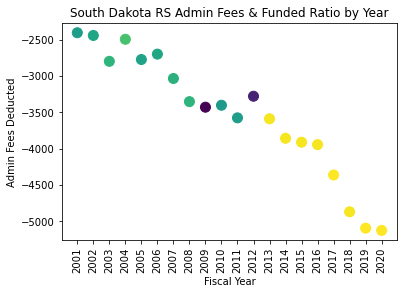

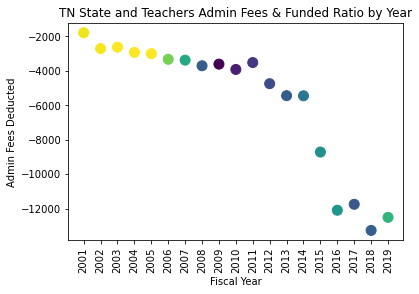

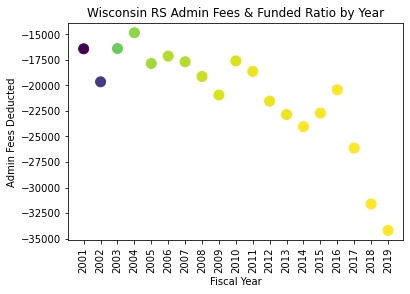

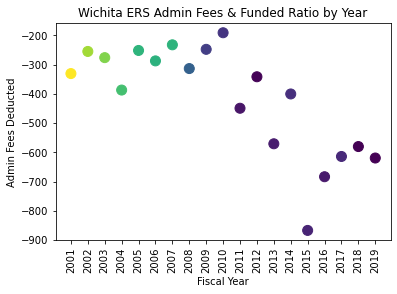

In [16]:
#Created a for loop to automatically build plots based on list of plan IDs
#Steady Plans
for plans in focus_plans_list:
    plan_x=plan_income_funded_data_df[plan_income_funded_data_df["ppd_id"]==plans]
    plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
    plan_x_adminexp=plan_x["expense_AdminExpenses"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Admin Fees & Funded Ratio by Year')
    plt.ylabel("Admin Fees Deducted")
    plt.xlabel("Fiscal Year")
    plt.scatter(plan_x_fy,plan_x_adminexp,c=plan_x_fundrat, s=100)
    plt.xticks(rotation=90)
    plt.show()

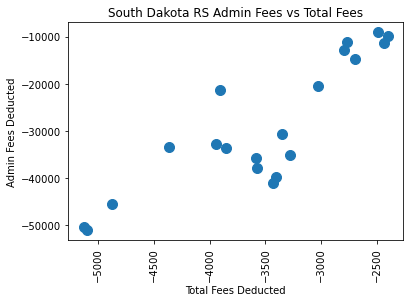

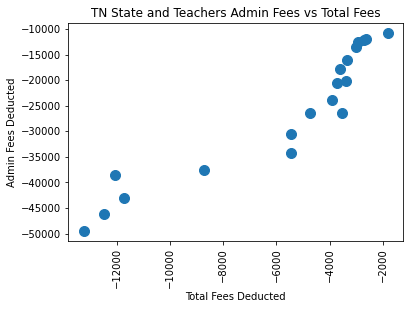

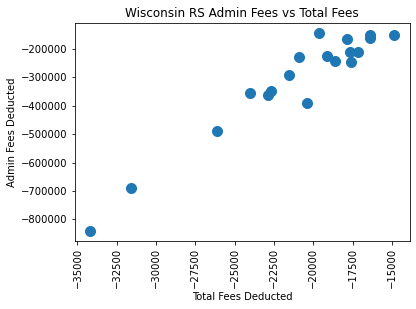

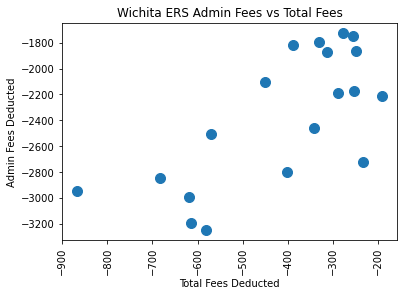

In [18]:
for plans in focus_plans_list:
    plan_x=plan_income_funded_data_df[plan_income_funded_data_df["ppd_id"]==plans]
    plan_x_totalexp=plan_x["expense_investments_tot"]
    plan_x_adminexp=plan_x["expense_AdminExpenses"]
    plan_x_fy=plan_x["fy"]
    plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
    plt.title(f'{plan_x_name} Admin Fees vs Total Fees')
    plt.ylabel("Admin Fees Deducted")
    plt.xlabel("Total Fees Deducted")
    plt.scatter(plan_x_adminexp,plan_x_totalexp,s=100)
    plt.xticks(rotation=90)
    plt.show()